In [1]:
from hyperparameters import *
import torch
from simple_UNet import UNet
import matplotlib.pyplot as plt

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

In [7]:
PATH = r"/Users/nianziyi/Desktop/Hair_Segmentation_Recoloring/simple_UNet/results_dice/20epochs_0.001lr_20batch/network.pth"
unet = UNet(in_channels=3,
            out_channels=1,
            n_class=1,
            kernel_size=3,
            padding=1,
            stride=1).to(device)

In [8]:
unet.load_state_dict(torch.load(PATH, map_location=torch.device('cpu')))

<All keys matched successfully>

torch.Size([5, 1024, 1024, 3])
torch.Size([5, 3, 1024, 1024])
torch.Size([5, 1024, 1024, 3])


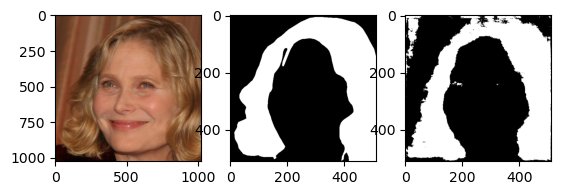

In [26]:
for x,y in test_loader:
    index = 4
    print(x.shape)
    x = torch.permute(x, (0, 3, 1, 2))
    print(x.shape)
    out = torch.squeeze(unet(x)[index])
    out = out_to_mask(out)
    out_nograd = out.detach().numpy()

    x = torch.permute(x, (0, 2, 3, 1))
    print(x.shape)
    x = x[index]
    # x = x.detach().numpy()
    
    y_1 = torch.squeeze(y)[index]
    # y_1 = y_1.detach().numpy()
    
    plt.subplot(1,3,1)
    plt.imshow(x)
    
    plt.subplot(1,3,2)
    plt.imshow(y_1, cmap='gray')
    
    plt.subplot(1,3,3)
    plt.imshow(out_nograd, cmap='gray')
    break

In [51]:
acc = acc_fn(out, y, batch_size)

In [52]:
print(acc)

0.6820869445800781
